In [34]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [13]:
with open('film_infoboxes_baseline.pkl', 'rb') as handle:
    baseline_infobox_dict = pickle.load(handle)

In [14]:
with open('film_infoboxes_gt_english.pkl', 'rb') as handle:
    gt_infobox_dict = pickle.load(handle)

In [15]:
with open('film_infoboxes_english_wikidata.pkl', 'rb') as handle:
    wikidata_infobox_dict = pickle.load(handle)

In [16]:
baseline_pages = list(baseline_infobox_dict.keys())
gt_pages = list(gt_infobox_dict.keys())
wikidata_pages = list(wikidata_infobox_dict.keys())

In [28]:
valid_pages = [baseline_pages,gt_pages,wikidata_pages]
res = set(valid_pages[0]).intersection(*valid_pages)
valid_pages = list(res)

In [78]:
def pair_splitter(pair_list):
    key_list = []
    value_list = []
    for pair in pair_list:
        key = pair.split(' = ')[0]
        value = pair.split(' = ')[1]
        if key and value:
            key_list.append(key)
            value_list.append(value)
    return key_list, value_list

def precision_keys(model_keys, ground_keys):
    true_positive = 0
    for key in ground_keys:
        if key in model_keys:
            true_positive += 1
    precision = true_positive/(len(ground_keys))
    return precision

def precision_values(model_values, ground_values):
    model_bag = []
    ground_bag = []
    
    for value_str in model_values:
        str_entries = value_str.split(",")
        for entry in str_entries:
            words = entry.split(" ")
            for word in words:
                model_bag.append(word.lower())
    
    for value_str in ground_values:
        str_entries = value_str.split(",")
        for entry in str_entries:
            words = entry.split(" ")
            for word in words:
                ground_bag.append(word.lower())
#     print(model_bag)
#     print(ground_bag)
    true_positive = 0
    for key in ground_bag:
        if key.lower() in model_bag:
            true_positive += 1
#     precision = true_positive/(0.5*(len(ground_bag) + len(model_bag)))
#     precision = true_positive/((len(ground_bag)*len(model_bag))**0.5)
#     precision = true_positive/(2*1/(1/len(ground_bag) + 1/len(model_bag)))
    precision = true_positive/len(ground_bag)
    return precision, len(model_bag)/len(ground_bag)

In [79]:
baseline_keys_prec = {}
baseline_vals_prec = {}
wikidata_keys_prec = {}
wikidata_vals_prec = {}
base_ratio_list = []
wiki_ratio_list = []
for key in valid_pages:
    baseline = baseline_infobox_dict[key]
    wikidata = wikidata_infobox_dict[key]
    ground = gt_infobox_dict[key]
    
    base_keys, base_values = pair_splitter(baseline)
    wikidata_keys, wikidata_values = pair_splitter(wikidata)
    ground_keys, ground_values = pair_splitter(ground)
    
    baseline_keys_prec[key] = precision_keys(base_keys, ground_keys)
    baseline_vals_prec[key],tmp = precision_values(base_values, ground_values)
    base_ratio_list.append(tmp)
    
    wikidata_keys_prec[key] = precision_keys(wikidata_keys, ground_keys)
    wikidata_vals_prec[key],tmp = precision_values(wikidata_values, ground_values)
    wiki_ratio_list.append(tmp)

In [80]:
print('baseline keys average precision: ',np.mean(list(baseline_keys_prec.values())))
print('baseline vals average precision: ',np.mean(list(baseline_vals_prec.values())))
print('wikidata keys average precision: ',np.mean(list(wikidata_keys_prec.values())))
print('wikidata vals average precision: ',np.mean(list(wikidata_vals_prec.values())))

baseline keys average precision:  0.00643558484689089
baseline vals average precision:  0.12258031226219927
wikidata keys average precision:  0.5254712021109224
wikidata vals average precision:  0.37045765800597474


<BarContainer object of 162 artists>

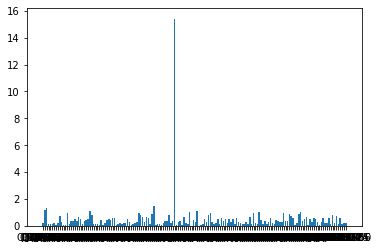

In [65]:
plt.bar(list(baseline_keys_prec.keys()),base_ratio_list)

<BarContainer object of 162 artists>

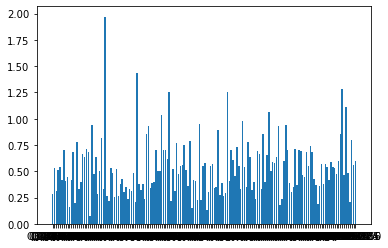

In [68]:
plt.bar(list(wikidata_keys_prec.keys()),wiki_ratio_list)

<BarContainer object of 162 artists>

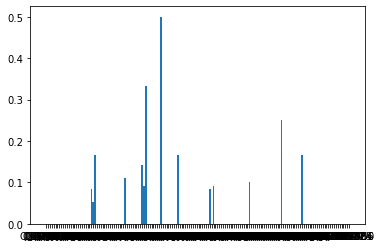

In [60]:
plt.bar(list(baseline_keys_prec.keys()),list(baseline_keys_prec.values()))

<BarContainer object of 162 artists>

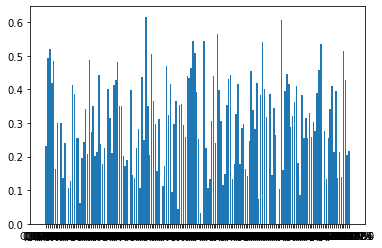

In [57]:
plt.bar(list(baseline_vals_prec.keys()),list(baseline_vals_prec.values()))

<BarContainer object of 162 artists>

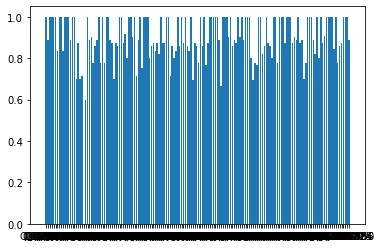

In [58]:
plt.bar(list(wikidata_keys_prec.keys()),list(wikidata_keys_prec.values()))

<BarContainer object of 162 artists>

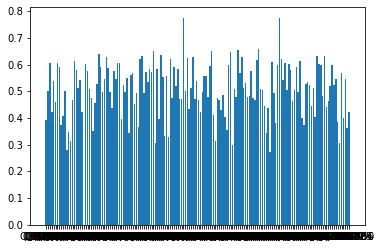

In [59]:
plt.bar(list(wikidata_vals_prec.keys()),list(wikidata_vals_prec.values()))

In [4]:
base_keys, base_values = pair_splitter(baseline)
wikidata_keys, wikidata_values = pair_splitter(wikidata)
ground_keys, ground_values = pair_splitter(ground)

In [5]:
prec_keys=precision_keys(base_keys, ground_keys)
prec_values=precision_values(base_values, ground_values)
print('Precision of Keys for baseline:', prec_keys)
print('Precision of Values for baseline:', prec_values)

Precision of Keys for baseline: 0.05263157894736842
Precision of Values for baseline: 0.3076923076923077


In [6]:
prec_keys=precision_keys(wikidata_keys, ground_keys)
prec_values=precision_values(wikidata_values, ground_values)
print('Precision of Keys for our Model:', prec_keys)
print('Precision of Values for our Model:', prec_values)

Precision of Keys for our Model: 0.7857142857142857
Precision of Values for our Model: 0.8181818181818182


In [7]:
prec_keys=precision_keys(ground_keys, ground_keys)
prec_values=precision_values(ground_values, ground_values)
print('Precision of Keys for our Model:', prec_keys)
print('Precision of Values for our Model:', prec_values)

Precision of Keys for our Model: 1.0
Precision of Values for our Model: 1.0
